### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

In [4]:
from datetime import datetime
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn import model_selection

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import statsmodels.api as sm
import numpy as np

## Loading Data into Python:

#### Change the directory.

In [5]:
#os.chdir("C:/Users/Kshitij/Desktop/Study/Semester/Course Spring 2018/Machine Learning")
data = pd.read_csv('bitcoin_dataset.csv',header=0, parse_dates=['Date'])
test = pd.read_csv('test_set.csv',header=0, parse_dates=['Date'])
data['Year'] = data['Date'].apply(lambda x: x.year)

## Time-Series plot of Bitcoin Price from 2010 to 2018

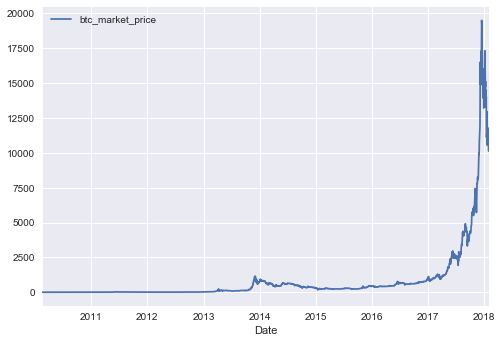

In [6]:
ts=data[['Date','btc_market_price']].set_index('Date').plot()
plt.show()

As seen above, there is no major trend before 2014, so lets remove data and keep only those observations which comes post 2014

In [7]:
data = data.loc[data['Date'] >= datetime(2014,1,1)]
test = test.loc[test['Date'] >= datetime(2014,1,1)]

## Finding Correlation between to features of the variable

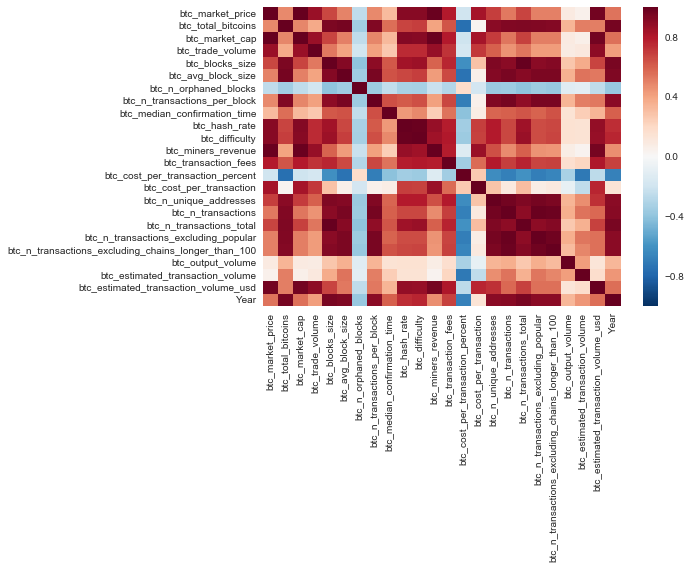

In [8]:
sns.heatmap(data.corr())
plt.show()

## Removing Correlated variables and Irrelevant Variables

In [9]:
mod_data=data[['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap','btc_trade_volume']]
test_mod=test[['Date', 'btc_total_bitcoins', 'btc_market_cap','btc_trade_volume']]

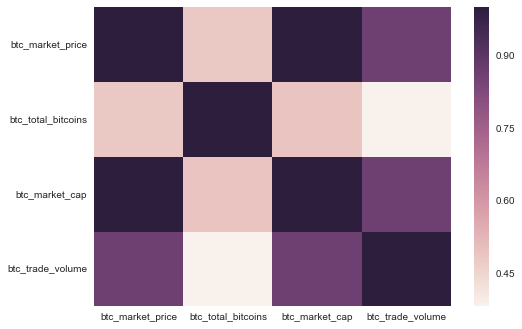

In [10]:
sns.heatmap(mod_data.corr())
plt.show()

## Preprocessing: FIlling in the NA's with the mean values

In [11]:
#Removing NA's
names_data = mod_data.columns.values
names_test=test_mod.columns.values
names_data=np.delete(names_data, 0)
names_test=np.delete(names_test, 0)
mod_data=mod_data.fillna(mod_data.mean(), inplace=True)
test_mod=test_mod.fillna(test_mod.mean(), inplace=True)
print(test_mod.isnull().sum())

C:\Users\admis\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Date                  0
btc_total_bitcoins    0
btc_market_cap        0
btc_trade_volume      0
dtype: int64


In [12]:
mod_data_y=mod_data['btc_market_price']
mod_data_x=mod_data.drop(['Date','btc_market_price'],1)
test_mod=test_mod.drop('Date',1)

In [13]:
#Scaling

scaler = preprocessing.MinMaxScaler()
scaled_data_x = scaler.fit_transform(mod_data_x)
scaled_data_y= scaler.fit_transform(mod_data_y)
scaled_test = scaler.fit_transform(test_mod)

C:\Users\admis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\admis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


## Start building Models

In [14]:
seed = 7
scoring = 'mean_squared_error'

In [15]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RidgeR', Ridge(alpha=20.0)))
models.append(('LassoR', Lasso(alpha=0.015)))
models.append(('SVM', SVR()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, scaled_data_x, scaled_data_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(arr_x)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, arr_y,random_state = 0)
                                                   
linreg = Ridge().fit(X_train, y_train)
pred=linreg.predict(X_train)

print('Polynomial:',mean_squared_error(pred, y_train))

LR: -0.000020 (0.000048)
KNN: -0.011633 (0.034362)
RidgeR: -0.020277 (0.057954)
LassoR: -0.026380 (0.075202)
SVM: -0.021868 (0.040970)


C:\Users\admis\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admis\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admis\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admis\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\admis\Anaconda3\lib\site-pa

NameError: name 'arr_x' is not defined

Since polynomial regression gives us the best MSE, lets do a Grid search for finding the degree of the polynomial which gives us the best MSE

In [16]:
score=[]
degree=[]
for i in range(1,15):
    poly = PolynomialFeatures(degree=i)
    X_F1_poly = poly.fit_transform(scaled_data_x)
    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, scaled_data_y,random_state = 0)
    linreg = Ridge().fit(X_train, y_train)
    pred=linreg.predict(X_train)
    mse=mean_squared_error(pred, y_train)
    score.append(mse)
    degree.append(i)
    print(i,mse)

1 6.39974730257e-05
2 3.85929665857e-05
3 3.31531888183e-05
4 3.3084114108e-05
5 3.60137578986e-05
6 3.94679673552e-05
7 4.26250864771e-05
8 4.53518345384e-05
9 4.75958109703e-05
10 4.92711545416e-05
11 5.03115103352e-05
12 5.07137098421e-05
13 5.05384631111e-05
14 4.98868057985e-05


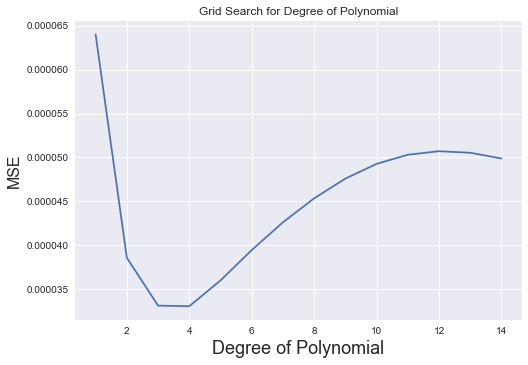

In [17]:
fig=plt.plot(degree,score)
plt.xlabel('Degree of Polynomial', fontsize=18)
plt.ylabel('MSE', fontsize=16)
plt.title('Grid Search for Degree of Polynomial')
plt.show()

In [18]:
poly = PolynomialFeatures(degree=4)
poly_x = poly.fit_transform(scaled_data_x)
poly_y = poly.fit_transform(scaled_test)
X_train, X_test, y_train, y_test = train_test_split(poly_x, scaled_data_y,random_state = 0)
linreg = Ridge().fit(X_train, y_train)

pred=linreg.predict(X_train)


## Residual plot to see if residual are normally distributed

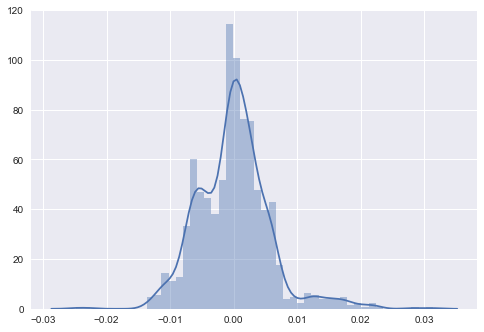

In [19]:
sns.distplot((y_train-pred),bins=50)
plt.show()

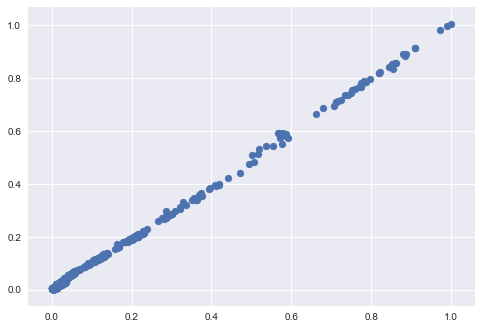

In [20]:
plt.scatter(y_train,pred)
plt.show()

### Running Model on our test data to predict the values of Target Variable "BTC_MARKET_PRICE"

In [23]:
pred_y=linreg.predict(poly_y)

## Inverse Transform to get the original values back from the data

In [26]:
#pred1=pred_y.reshape(-1,1)
#y_new=scaler.inverse_transform(pred1)

### Since inverse transform is not working, in-order to see if our model is predicting right values, lets skip Scaling and see the results.

We use data variables which we created before scaling.

In [27]:
poly_xx = poly.fit_transform(mod_data_x)
poly_yy = poly.fit_transform(test_mod)
X_train, X_test, y_train, y_test = train_test_split(poly_xx, mod_data_y,random_state = 0)
linreg = Ridge().fit(X_train, y_train)

pred=linreg.predict(X_train)

In [28]:
pred_yy=linreg.predict(poly_yy)
print(pred_yy)

[ 9089.70834466  8908.42374615  9079.38540427  8406.68899698  6854.67172997
  7691.77029331  8111.26818225  8250.05733778  8541.80396927  8324.57200341
  8346.14814899  8813.58245318  8588.05873694  9336.94558886]


**These non-scaled values coincides with the actual Bitcoin Price. Hence we can say that our model is working great on the data.**